Aquesta és la tasca del Lliurament 2 del mòdul Sistemes d'Aprenentatge Automàtic.

Té cinc preguntes amb quatre apartats cadascuna, totes amb la mateixa puntuació.

#Descens de gradient

Explorau l'efecte de la taxa d'aprenentatge sobre l'algorisme de descens del gradient al simulador que trobareu a https://uclaacm.github.io/gradient-descent-visualiser/#playground

Triau com a funció $10sin(x)$ (haureu d'escriure el coeficient) i com a punt d'inici $x=2$.

Primer, explorau com l'algorisme convergeix a diferents mínims segons quin és el punt inicial que triam.

A continuació, indicau si l'algorisme presenta un comportament **convergent**, **divergent** o **oscil·latori** per als següents valors de la taxa d'aprenentatge.

a) $\alpha = .125$

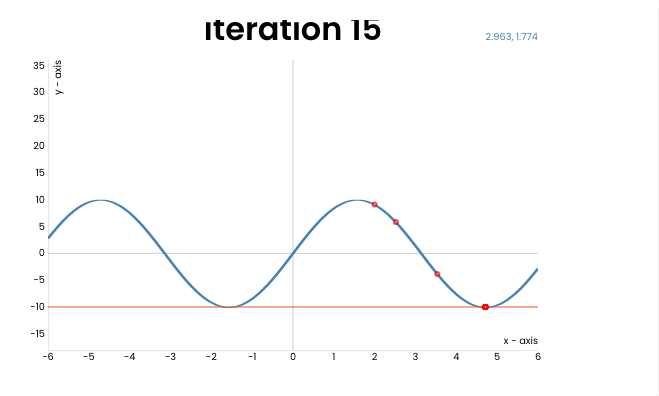

Després de unes quantes iteracions, moltes per comprovar-ho, s'observa un comportament conversent amb una taxa d'aprenentatge baixa.

b) $\alpha = .25$

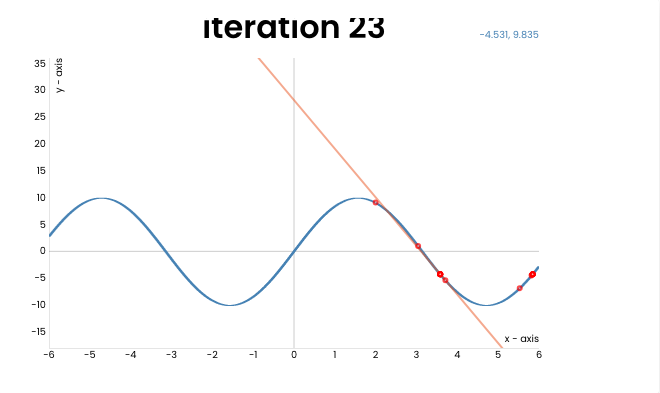

Amb una taxa d'aprenentatge moderada, observam un comportament oscillatori entre els punts y = 3.58 i y = 5.8

c) $\alpha = .5$

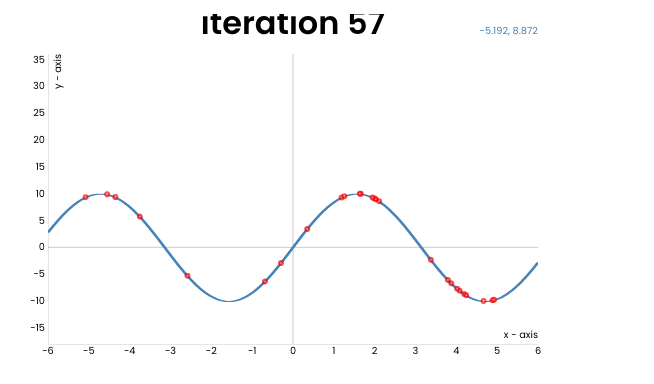

Aqui observam que quan la taxa d'aprenentatge es alta, el comportament acaba sent diverget

d) Com es comporta l'algorisme si en lloc de triar una taxa d'aprenentatge positiva la triam negativa?

L’algorisme es mourà en la direcció oposada al gradient, és a dir, ascendint en lloc de descendir. Això farà que l’algorisme divergeixi del mínim, fracassant completament en la seva convergència.

#Regressió logística

Al codi següent, extret de https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py afegiu-hi les línies que necessiteu i responeu les qüestions següents, referides a la regressió logística.

a) Quin és el valor del pes **w**?

b) Quin és el valor del biaix **b**?

c) Quin punt de tall en x marca la frontera entre la classe positiva i la negativa?

d) Quin paràmetre de regularització s'utilitza?

Pes (w): 6.866805804226174
Bias (b): -1.638899398538546
Punt de tall (x): 0.23866983358257865
Parametre de regularització ja està definit com C=1e5


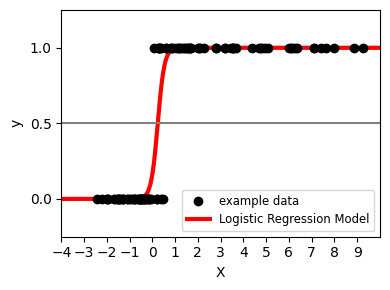

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LogisticRegression

# Generate the dataset
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)  # Regularization parameter C
clf.fit(X, y)

# Pes i bias
w = clf.coef_[0][0]
b = clf.intercept_[0]
print(f"Pes (w): {w}")
print(f"Bias (b): {b}")

# Calcular punt de tall
punt_tall = -b / w
print(f"Punt de tall (x): {punt_tall}")

# Parametre de reguralitzacio
print(f"Parametre de regularització ja està definit com C=1e5" )

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

El pes w és el coeficient que determina la inclinació de la recta en la regressió logística. Aquest valor es calcula a partir de clf.coef_. Aquest coeficient és essencial perquè afecta directament com la funció logística s’ajusta a les dades. Si w és molt alt o molt baix, això afecta la velocitat amb què la probabilitat canvia al voltant de la frontera de decisió.

El biaix b és un valor constant que ajusta la funció logística per traslladar la frontera de decisió (on el model canvia de classe) en l’eix X. Aquest valor es calcula a partir de clf.intercept_. El biaix és crucial perquè permet ajustar la funció logística per centrar-la correctament, independentment de l’escala de les dades d’entrada.

La frontera de decisió és el punt on el model prediu un 50% de probabilitat per a cada classe. Matemàticament, aquest punt s’obté resolent la següent equació de la funció logística:


w * x + b = 0


El punt de tall en x és:


x = -b / w



#Màquines de suport vectorial

Aplicau els quatre classificadors basats en SVM de la pàgina https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html al problema de la XOR. El codi que necessitam ja està copiat aquí al quadern, no l'heu de dur de la web.

a) Generau $400$ punts amb coordenades $x[:,0]$ i $x[:,1]$ aleatòries uniformement repartides entre $-1$ i $1$.
https://numpy.org/doc/1.15/reference/generated/numpy.random.rand.html

In [41]:
import numpy as np
np.random.seed(42)
X = np.random.uniform(-1, 1, (400, 2))

b) Per a cada punt, assignau l'etiqueta de classe $y$ igual a $1$ si les dues coordenades són del mateix signe i $0$ si són de signe oposat.

In [42]:
y = np.where((X[:, 0] * X[:, 1]) > 0, 1, 0)

c) Visualitzau les dades que heu generat. Heu d'obtenir un gràfic semblant al de l'apartat dels apunts de SVM amb kernel.

Per aconseguir-ho, executau la cel·la següent, que modelitzarà les dades que heu generat.

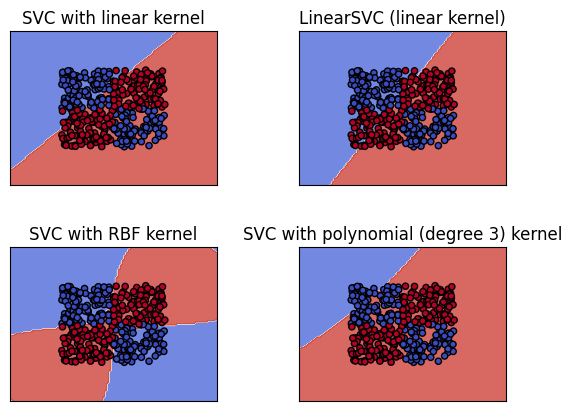

In [43]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Observau que el model que millor s'ajusta a les dades és el que utilitza kernel RBF.

d) Finalment, explorem la influència del paràmetre $\gamma$ en la simetria del model. Per això, en lloc de mostrar quatre models diferents, ara mostrareu nou variants d'un mateix model, el de kernel RBF amb nou valors diferents de $\gamma$, de $0.1$ a $0.9$. Copiau el codi de la cel·la anterior en la següent i modificau-lo de forma que es puguin veure simultàniament els nou gràfics. Haureu de canviar els paràmetres de `subplot`, els `title`...

Quin valor de $\gamma$ és el que dona un resultat més simètric?

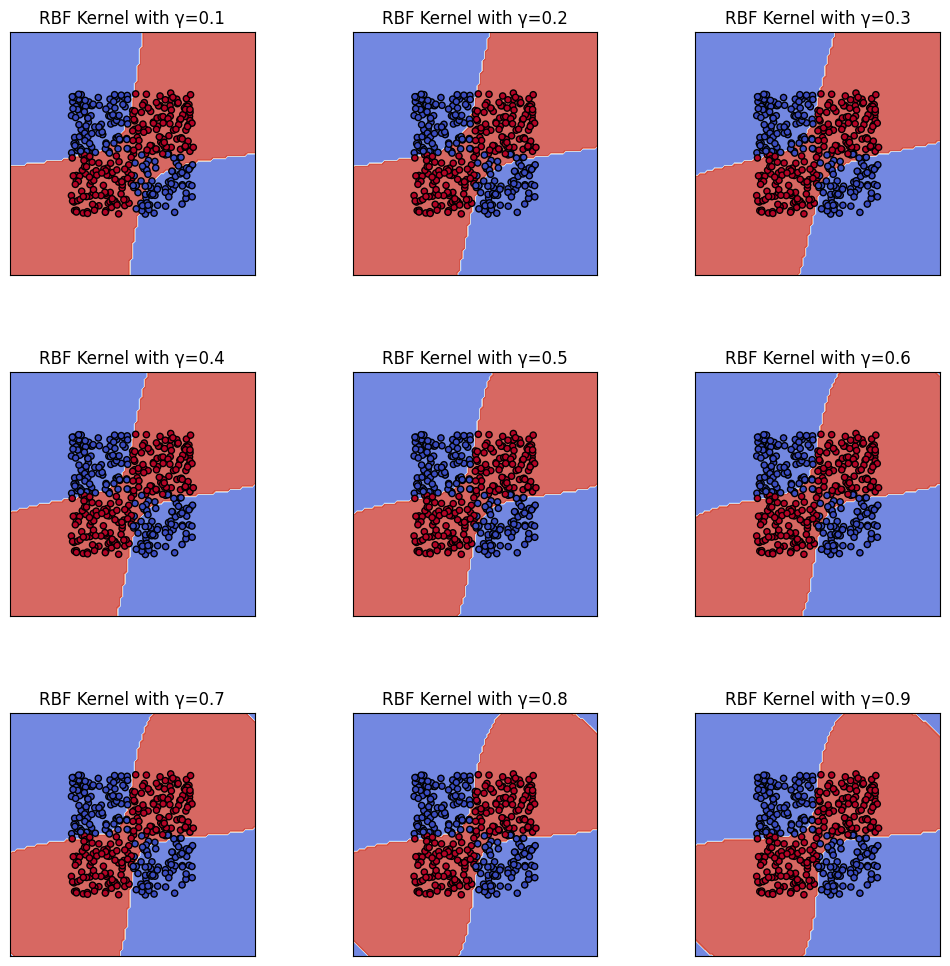

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

# valors de gamma
valors_gamma = np.linspace(0.1, 0.9, 9)

models = [svm.SVC(kernel="rbf", gamma=gamma, C=1.0).fit(x, y) for gamma in valors_gamma]

titles = [f"RBF Kernel with γ={gamma:.1f}" for gamma in valors_gamma]

fig, sub = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#Arbres de decisió

Modificau l'exemple d'arbre de decisió que trobareu a https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html de forma que utilitzi les mateixes característiques que als apunts: la longitud i l'amplada del pètal. Hi ha un requadre al [quadern de classificació](https://colab.research.google.com/drive/1IC31YREPePBlheVHL3zLL1vW4Sb5NFQk?usp=sharing) sota el títol **Preparació de les dades** on se seleccionen aquestes característiques.

Distribuïu el codi en els cinc apartats següents.

###Importacions i càrrega de les dades

In [45]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()

X = iris.data[:, 2:4]
y = iris.target

###Generació de la graella de punts

In [46]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

###Ajust del model i predicció

In [47]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### Visualització de les zones de decisió i de les dades d'entrenament

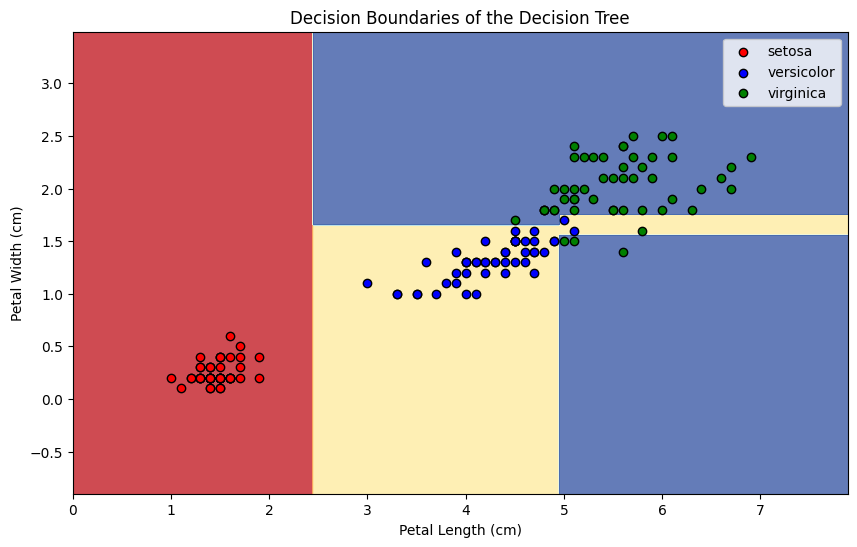

In [48]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

for i, color in zip(range(3), ['red', 'blue', 'green']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], label=iris.target_names[i], color=color, edgecolor='k')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundaries of the Decision Tree')
plt.legend()
plt.show()

Quan executeu el codi podreu observar la forma característica de les fronteres en els arbres de decisió, formada per segments paral·lels als eixos.

#Classificació k-nearest neighbours


En aquesta darrera pregunta explorarem l'efecte del nombre de veïns $k$ en l'algorisme KNN i ho relacionarem amb l'infraajust o sobreajust del model.

El codi està tot desenvolupat, la vostra feina aquí és interpretar els resultats i modificar qualque paràmetre numèric.

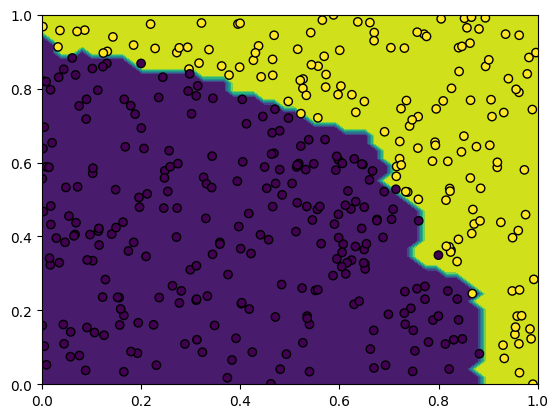

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()



**a) Per què convé que el nombre de veïns sigui senar?**

Tenir un nombre senar de veïns ajuda a evitar empats quan es fa la votació per a la classificació d’un punt, especialment en la classificació binària. Amb un nombre parell de veïns, podria haver-hi un empat entre les dues classes, cosa que genera ambigüitat. Un nombre senar assegura que sempre es pugui determinar una classe majoritària.

**b) Explicau per què no tots els punts de dades estan classificats correctament.**

No tots els punts de dades estan classificats correctament a causa de la frontera de decisió creada pel classificador KNN, que està influenciada per la distribució i densitat dels punts. KNN utilitza la classe majoritària dels veïns propers per classificar un punt, cosa que significa que alguns punts propers a la frontera poden estar influenciats per veïns de la classe oposada, provocant errors de classificació.

**c) Quin valor de $k$ garantiria que tots els punts de dades estarien classificats correctament? Podeu comprovar-ho experimentant al codi.**

En general, establir  k = 1  (utilitzant només el veí més proper) probablement classificaria correctament tots els punts de dades, ja que a cada punt se li assignaria la classe del seu veí més proper, que normalment és ell mateix. Tanmateix, aquest enfocament sovint condueix a un sobreajust, ja que el model captarà el soroll en les dades en lloc del patró general.

**d) Quin problema presentaria en aquest cas el model, infraajust o sobreajust?**

Utilitzar un valor molt baix de  k  (com  k = 1 ) comportaria un sobreajust. El model es tornaria massa sensible a les posicions específiques dels punts individuals, capturant el soroll en les dades en lloc de la tendència general. Això resultaria en una frontera de decisió complexa que s’adapta massa als punts de dades d’entrenament, cosa que podria afectar negativament el rendiment del model en noves dades no vistes.